# Relative Contagiousness Alpha Variant (B.1.1.7) of SARS-CoV-2 
## (formerly known as the British variant)

In [2]:
#import Pkg; Pkg.add("DataFrames"); Pkg.add("Plots");  Pkg.add("GLM");  Pkg.add("StatsBase"); Pkg.add("Gadfly"); Pkg.add("GR");Pkg.add("ColorSchemes"); Pkg.add("LaTeXStrings"); Pkg.add("Latexify")
using DataFrames, Plots, GLM, StatsBase, LinearAlgebra, Latexify, Formatting,  ColorSchemes, LaTeXStrings

## 🇩🇰 Data: Weekly number of new cases, sequenced tests, and number of Alpha cases
Starting with data from week 46 in 2020 and continuing into 2021.
Cases is the weekly number of new COVID-19 cases
$n$ is the number of sequenced positive tests (with definite outcome)
$x$ is the number of sequenced positive tests identified as the Alpha variant.

In [3]:
# Data up until Week 10. Vintage: April 7, 2021 (Last reported)
dfAlpha     = DataFrame(
    Week    = ["W46","W47","W48","W49","W50","W51","W52","W53","W01","W02","W03","W04","W05", "W06" , "W07" , "W08", "W09", "W10"], 
    Tested  = [ 489227,501456,500840,542206,690829,877462,644554,534547,559716,593713,737395,765996,788640,802829,829088,955269,1032966, 1056364 ],
    Cases   = [ 7533,    8456,  8774, 12816, 21925, 24579, 17043, 14560, 11311,  7008,  5321,  3616,  3096,  2716,  3335,  3688,   3616, 3809],
    n       = [ 1486,    1941,  2127,  2868,  4226,  4943,  3633,  3916,  4161,  4230,  3688,  2660,  2235,  1974,  2416,  2683,   2699, 2874],
    x       = [    4,       3,     7,    11,    16,    37,    64,    80,   157,   298,   473,   519,   663,   929,  1590,  2042,   2299, 2657])

,Week,Tested,Cases,n,x
,String,Int64,Int64,Int64,Int64
1,W46,489227,7533,1486,4
2,W47,501456,8456,1941,3
3,W48,500840,8774,2127,7
4,W49,542206,12816,2868,11
5,W50,690829,21925,4226,16
6,W51,877462,24579,4943,37
7,W52,644554,17043,3633,64
8,W53,534547,14560,3916,80
9,W01,559716,11311,4161,157


## Compute Sequencing ratio, Alpha Prevalence, and standard errors
For a binomial distribution, the expected value is estimated by $$q = x/n$$ and the corresponding standard errors are $$\sigma = \sqrt{q(1-q)/n}.$$

## Proportion of positive tests being sequenced

In [4]:
dfAlpha.SeqRatio = dfAlpha.n ./ dfAlpha.Cases;

## Proportion of sequenced tests that are Alpha variant

In [5]:
q = dfAlpha.x ./ dfAlpha.n
dfAlpha.q = q;

## Standard errors for q = x/n

In [6]:
dfAlpha.σ = sqrt.(dfAlpha.q.*(1 .-dfAlpha.q) ./ dfAlpha.n) 
dfAlpha

,Week,Tested,Cases,n,x,SeqRatio,q,σ
,String,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,W46,489227,7533,1486,4,0.197265,0.00269179,0.00134408
2,W47,501456,8456,1941,3,0.229541,0.0015456,0.00089166
3,W48,500840,8774,2127,7,0.242421,0.00329102,0.00124184
4,W49,542206,12816,2868,11,0.223783,0.00383543,0.0011542
5,W50,690829,21925,4226,16,0.192748,0.00378609,0.000944728
6,W51,877462,24579,4943,37,0.201107,0.00748533,0.00122597
7,W52,644554,17043,3633,64,0.213167,0.0176163,0.00218255
8,W53,534547,14560,3916,80,0.268956,0.020429,0.00226058
9,W01,559716,11311,4161,157,0.367872,0.0377313,0.00295393


# Replicating Figure 1 (alpha) 
The Prevalence of Alpha variant by week

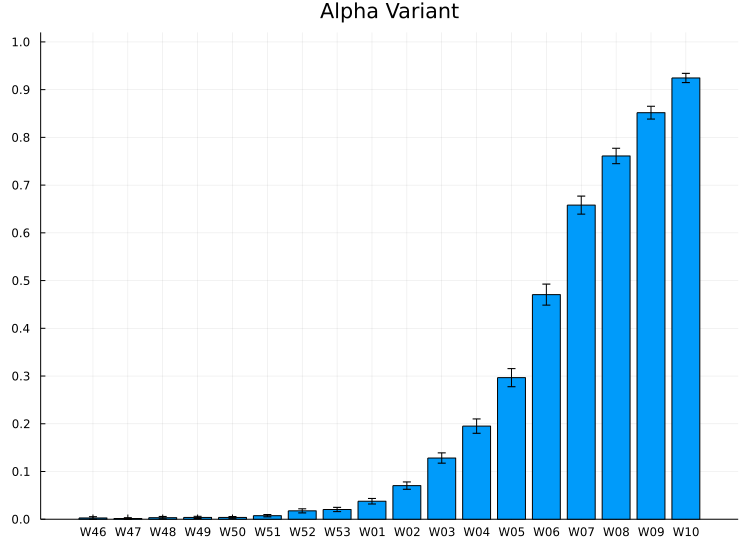

In [7]:
T = size(dfAlpha,1)      # sample size
bar( dfAlpha.q, legend=false, xticks = (1:T, dfAlpha.Week), size=(750,550), 
    ylims=(0,1.02), yticks = 0.0:0.1:1.0,
    title="Alpha Variant", 
    yerror=1.96.*dfAlpha.σ,fmt=png
)

# Basic Model for Analysis
Virus A (old variant).  New weekly cases evolve according to $A_t = a_t A_{t-1}$

Virus B (Alpha variant). New weekly cases evolve according to $B_t = b_t B_{t-1}$ 

The model will be based on the assumption that $$b_t = \gamma a_t,$$ where $\gamma$ measure the relative contagiouness of Alpha relative to the existing variant. 

$\gamma$ is the parameter of interest.

# Crude Measurements on $\gamma$
Note that 
$$ \frac{B_t/B_{t-1}}{A_t/A_{t-1}} = \frac{\gamma a_t}{a_t}=\gamma. $$
We can rearrange the terms in the expression as follows,
$$ \gamma = \left. \frac{B_t}{A_t} \right/ \frac{B_{t-1}}{A_{t-1}}. $$ 
We do not observe the ratios, $\frac{B_t}{A_t}$ and $\frac{B_{t-1}}{A_{t-1}}$, but we can use the observed proportion of the Alpha variant and scale the case numbers up. 

In [8]:
dfAlpha.Â = dfAlpha.Cases .* (1.0 .-dfAlpha.q)
dfAlpha.B̂ = dfAlpha.Cases .* dfAlpha.q
hcat(dfAlpha.Week,convert(Array{Int64},hcat(round.(dfAlpha.Â),round.(dfAlpha.B̂))));

This gives os a crude approximation to $\gamma$,
$$ \hat\gamma_t = \frac{\hat B_t/\hat B_{t-1}}{\hat A_t/\hat A_{t-1}}, $$ 
which we compute and plot below.

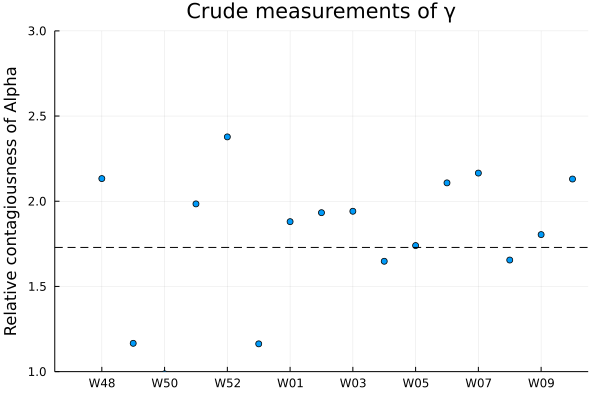

In [9]:
dfAlpha.odds = dfAlpha.q ./ (1.0 .- dfAlpha.q)
scatter(dfAlpha.Week[2:end], dfAlpha.odds[2:end]./dfAlpha.odds[1:end-1],legend=:none, ylim=(1,3),
    title="Crude measurements of γ",ylabel ="Relative contagiousness of Alpha",fmt=png)
plot!(x -> sum(dfAlpha.odds[2:end]./dfAlpha.odds[1:end-1])/(T-1),xlim=(0,T-1),linestyle = :dash, linecolor = :black)

It would be nice to add some standard errors... so let's do that... we can use...
$$ \hat\gamma_t = \frac{\hat B_t/\hat B_{t-1}}{\hat A_t/\hat A_{t-1}}  = \left.  \frac{x_t}{n_t-x_t} \right/ \frac{x_{t-1}}{n_{t-1}-x_{t-1}}, $$ 
ratio of two binomial... crunch crunch.. delta-method... crunch crunch...

# Replicating Figure 3 (alpha)

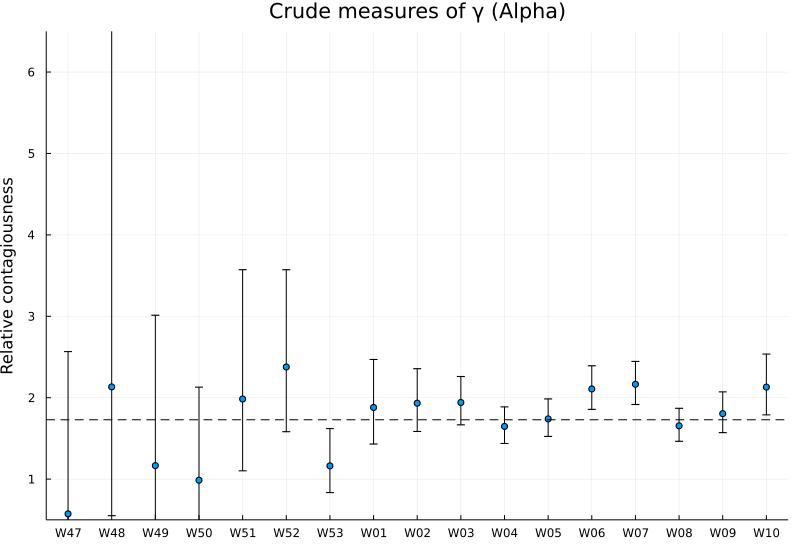

In [10]:
VarLogOdds    = 1.0 ./ ( dfAlpha.n .* dfAlpha.q .* (1 .- dfAlpha.q))
StdErrRelLogOdds = sqrt.(VarLogOdds[2:end] .+ VarLogOdds[1:end-1])
OddsRatio = dfAlpha.odds[2:end]./dfAlpha.odds[1:end-1]

scatter(dfAlpha.Week[2:end], OddsRatio,legend=:none, ylim=(0.5,6.5), fmt=png, size=(800,550), 
    yerror =(OddsRatio .- exp.(log.(OddsRatio) .- 1.96.*StdErrRelLogOdds) ,exp.(log.(OddsRatio) .+ 1.96.*StdErrRelLogOdds) .- OddsRatio),
title="Crude measures of γ (Alpha)", ylabel ="Relative contagiousness")
plot!(x -> sum(dfAlpha.odds[2:end]./dfAlpha.odds[1:end-1])/(T-1),xlim=(0,T-1),linestyle = :dash, 
    xticks = (0.5:1:T-0.5, dfAlpha.Week[2:end]),
    linecolor = :black)

These are noisy measurements with an average between 1.5 and 2. The exact figure is: 

In [11]:
print("Crude estimate of γ is ", round(sum(dfAlpha.odds[2:end]./dfAlpha.odds[1:end-1])/(T-1),digits=3))

Crude estimate of γ is 1.729

Week 52 (the week of Christmas) appears to have slight oversampling of Alpha cases, causing the ratio to be high in week 52 and low in week 53 (via the lagged value in the denominator). This highlights that an "outlier" in one week will create disturbances in two consecutive weeks.

Below we use a far better estimation method, maximum likelhood, and find $\hat\gamma\approx1.86$.

## Add trendline to data 
(Integer corresponds to middle of the week, Thursday)

In [42]:
#Add column with time trend for glm estimation
    dfAlpha.time_trend = convert(Array{Float64},collect(1:size(dfAlpha,1))) 

18-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
 14.0
 15.0
 16.0
 17.0
 18.0

## The ratio of Alpha cases to all cases
We can introduce the ratio of Alpha cases to all cases,
$$\lambda_t = \frac{B_t}{A_t+B_t}.$$
From the dynamics for $A_t$ and $B_t$ it follows that the Alpha-ratio, progresses in the following manner:
$$\lambda_{t+1}= \frac{\gamma\lambda_t}{\gamma\lambda_t+(1-\lambda_t)}.$$
Below we estimate $\gamma\approx 1.8$ which implies that the percentage of Alpha cases from one week to the next will change as shown in the following figure, that includes the Danish progression of Alpha cases.

# Replicating Figure 2 (alpha)

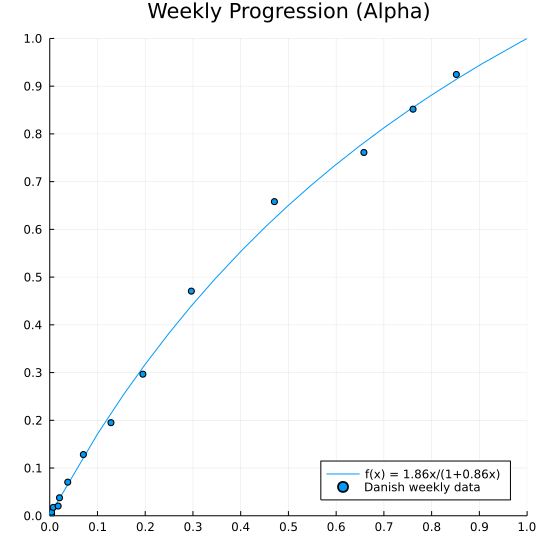

In [13]:
g = 1.86
plot(x->g*x/(1+(g-1)*x),
    xlim=(0,1), xticks = 0.0:0.1:1.0,
    ylim=(0,1), yticks = 0.0:0.1:1.0,
    legend=:bottomright, label="f(x) = $(g)x/(1+$(round(g-1,digits=2))x)", 
    fmt = png, size=(550,550),
        title="Weekly Progression (Alpha)")
scatter!(dfAlpha.q[1:end-1],dfAlpha.q[2:end],aspect_ratio = 1,
    label = "Danish weekly data",
    seriescolor = 1
)

We can then predict how things will unfold.

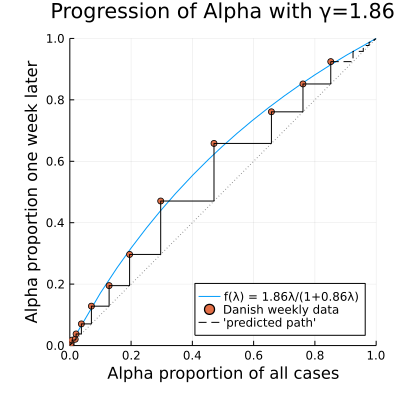

In [14]:
g = 1.86
plot(x->g*x/(1+(g-1)*x),xlim=(0,1),ylim=(0,1),legend=:bottomright, label="f(λ) = $(g)λ/(1+$(round(g-1,digits=2))λ)",
        title="Progression of Alpha with γ=$g",
        xlabel="Alpha proportion of all cases", 
        ylabel="Alpha proportion one week later", 
        fmt = :png, size=(400,400))
scatter!(dfAlpha.q[1:end-1],dfAlpha.q[2:end],aspect_ratio = 1,label = "Danish weekly data")
plot!(x->x,label=:false,xlim=(0,1),linestyle=:dot,linecolor=:gray)
plot!(dfAlpha.q[1:end-1],dfAlpha.q[2:end], linetype=:steppost, linecolor=:black,label=:false)


x = zeros(20,1); y = zeros(20,1)
x[1] = dfAlpha.q[end-1]
y[1] = dfAlpha.q[end]
for i in 2:20
    x[i] = y[i-1]
    y[i] = g*x[i]/(1+(g-1)*x[i])
end
plot!(x,y, linetype=:steppost, linestyle=:dash,linecolor=:black, label="'predicted path'")


## Maximum Likelihood Estimation with Logistic Regression
A better approach to estimating $\gamma$ that makes far better use of the information in the data is maximum likelihood estimation. Assuming that the sequenced positive tests constitute a representative random sample, we know that $x_t$ is binomally distributed $\mathrm{bin}(n_t,\lambda_t)$. 

Likelihood function for observations in week $t$, 
$$ L(\lambda_t) = \binom{N_t}{X_t} \lambda_t^{X_t}(1-\lambda_t)^{N_t-X_t}.$$

We express the log-likelihood function using the odds ratio $ \rho_t = \lambda_t/(1-\lambda_t)$ that has the very simple dynamics $\rho_t =\gamma \rho_{t-1}\cdots= \gamma^t\rho_0.$ 

Let $\alpha=\log\rho_0$ and $\beta=\log\gamma$ then
$$\Pr(Y_{i,t}=1) = \lambda_t 
    = \frac{\rho_t}{1+\rho_t}
     =\frac{\gamma^t\rho_0}{1+\gamma^t\rho_0}=\frac{\exp(\alpha+\beta t)}{1+\exp(\alpha+\beta t)}
      =\frac{1}{1+\exp(-\alpha-\beta t)}.$$
and it follows that the log-likelihood for all weekly observation is proportional to:
$$ \ell(\lambda_0,\gamma) \propto \sum_{t=1}^T {X_t} \log\frac{1}{1+\exp(-\alpha-\beta t)} +({N_t-X_t})\log(\frac{1}{1+\exp(\alpha+\beta t)}).$$  

The two unknown parameters (to be estimated from data) is, $\alpha$, and $\beta$.

The maximum likelihood estimates of these parameters are simply given by $$(\hat\alpha,\hat\beta) =\arg \max_{\alpha,\beta}\ell(\alpha,\beta),$$
and maximum likelihood gives us ways to test hypothesis and construct confidence intervals for the unknown parameters.

In [15]:
function logL(θ,n,x,tt,output)  
    α = θ[1]
    β = θ[2]
    λ = 1.0 ./ (1.0 .+ exp.(-α .- (β.*tt))) # tt = time trend
    ℓ = x.*log.(λ) .+ (n.-x) .* log.(1.0 .-λ)
    if output=="Total"       # Evaluate log-Likelihood (for maximization)
        sum(ℓ)
    elseif output=="Vector"  # Use for computing scores (Jacobian)
        ℓ
    end
end   
θ = [-10,0.6]
using   Optim, ForwardDiff
obj = θ -> -logL(θ,dfAlpha.n,dfAlpha.x,dfAlpha.time_trend,"Total")
    res = optimize(obj, θ, autodiff=:forward,iterations =10000,show_trace=false)
    θ .= Optim.minimizer(res) 
    α̂ = θ[1]; β̂ = θ[2]
    ρ̂₀ = exp(θ[1])
    γ̂  = exp(θ[2])
print("The maximum likelihood estimates are ρ̂₀ = $(round(ρ̂₀,digits=4)) and γ̂  = $(round(γ̂,digits=3)).")

The maximum likelihood estimates are ρ̂₀ = 0.0002 and γ̂  = 1.856.

## Verify by comparing with GLM package results

In [16]:
glmAlpha = glm(@formula(x / n ~ time_trend), dfAlpha, wts = dfAlpha.n, Binomial())
hcat(coef(glmAlpha),θ)  # Parameter estimates in the logistic regression model (trend)

2×2 Matrix{Float64}:
 -8.74932   -8.74932
  0.618619   0.618618

## Towards robust standard errors

In [17]:
function Parzen(k,K)      # Parzen kernel weights
    x = abs(k/K)
    x==0 ? 1 : x>1 ? 0 : x<0.5 ? 1-6*x^2+6*x^3 : 2*(1-x)^3
end
function VCOV(θ,n,x,tt,K=0)    # computes HAC robust variance covariance matrix
    T     = size(n,1) 
    S  = zeros(T,2)
    α = θ[1];    β = θ[2]
    λ = 1.0 ./ (1.0 .+ exp.(-α .- (β.*tt))) 
    S[:,1] = n.*λ .- x
    S[:,2] = S[:,1] .* tt
    h = n.*λ.*(1.0 .- λ)
    A = zeros(2,2)
    for t in 1:T
        A += h[t]*[1, t]*[1 t]
    end
    B = S'S
    for j=1:K
        B +=  Parzen(j,K+1)*(S[j+1:end,:]'S[1:end-j,:]+S[1:end-j,:]'S[j+1:end,:])
    end
    if K<0 # case with non-robust AVAR
        A^(-1)
    else
        A^(-1)*B*A^(-1)
    end
end  

VCOV (generic function with 2 methods)

In [18]:
# Robust standard errors
Σ̂  = VCOV(θ,dfAlpha.n,dfAlpha.x,dfAlpha.time_trend,4) 
σ₁ = √Σ̂[1,1]
σ₂ = √Σ̂[2,2]
print( "ROBUST STANDARD ERRORS: \n ",
    "α          = ", round(θ[1], digits=2)," [CI 95%: ", 
    round.(θ[1] -1.96*σ₁ , digits=2),",",
    round.(θ[1] +1.96*σ₁ , digits=2),"]       \n ",
    "β = log(γ) = ", round(θ[2], digits=3)," [CI 95%: ", 
    round.(θ[2] -1.96*σ₂ , digits=3),",",
    round.(θ[2] +1.96*σ₂ , digits=3),"]       \n ",
    
    "γ̂week      = ", round(exp(θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.(θ[2] -1.96*σ₂) , digits=2),",",
    round.(exp.(θ[2] +1.96*σ₂) , digits=2),"] \n ",
    
    "γ̂gen       = ", round(exp(4.7/7*θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.(4.7/7*(θ[2] -1.96*σ₂)) , digits=2),",",
    round.(exp.(4.7/7*(θ[2] +1.96*σ₂)) , digits=2),"]       ")

ROBUST STANDARD ERRORS: 
 α          = -8.75 [CI 95%: -9.0,-8.5]       
 β = log(γ) = 0.619 [CI 95%: 0.601,0.636]       
 γ̂week      = 1.86 [CI 95%: 1.82,1.89] 
 γ̂gen       = 1.51 [CI 95%: 1.5,1.53]       

In [19]:
#To be ported to Delta analysis...
print((θ[2]),"\n")
print(σ₂,"\n")

0.6186184471578016
0.00896286152111449


In [20]:
# AVAR GLM (non-robust)
Σ̂₀ = vcov(glmAlpha) # covariance matrix for α and β from GLM package
σ₂ = √Σ̂₀[2,2]
print( "NON-ROBUST STANDARD ERRORS: \n ",
    "γ̂gen       = ", round(exp(4.7/7*θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.(4.7/7*(θ[2] -1.96*σ₂)) , digits=4),",",
    round.(exp.(4.7/7*(θ[2] +1.96*σ₂)) , digits=4),"]   \n ")
# AVAR Robust standard errors
for k = -1:10
    Σ̂  = VCOV(θ,dfAlpha.n,dfAlpha.x,dfAlpha.time_trend,k) 
    σ₂ = √Σ̂[2,2]
    print( "ROBUST STANDARD ERRORS K = $k: \n ",
    "γ̂gen       = ", round(exp(4.7/7*θ[2]), digits=2)," [CI 95%: ", 
    round.(exp.(4.7/7*(θ[2] -1.96*σ₂)) , digits=4),",",
    round.(exp.(4.7/7*(θ[2] +1.96*σ₂)) , digits=4),"]       \n ")
end

NON-ROBUST STANDARD ERRORS: 
 γ̂gen       = 1.51 [CI 95%: 1.5037,1.5262]   
 ROBUST STANDARD ERRORS K = -1: 
 γ̂gen       = 1.51 [CI 95%: 1.5037,1.5262]       
 ROBUST STANDARD ERRORS K = 0: 
 γ̂gen       = 1.51 [CI 95%: 1.4994,1.5306]       
 ROBUST STANDARD ERRORS K = 1: 
 γ̂gen       = 1.51 [CI 95%: 1.499,1.531]       
 ROBUST STANDARD ERRORS K = 2: 
 γ̂gen       = 1.51 [CI 95%: 1.4986,1.5314]       
 ROBUST STANDARD ERRORS K = 3: 
 γ̂gen       = 1.51 [CI 95%: 1.498,1.532]       
 ROBUST STANDARD ERRORS K = 4: 
 γ̂gen       = 1.51 [CI 95%: 1.4971,1.5329]       
 ROBUST STANDARD ERRORS K = 5: 
 γ̂gen       = 1.51 [CI 95%: 1.4962,1.5339]       
 ROBUST STANDARD ERRORS K = 6: 
 γ̂gen       = 1.51 [CI 95%: 1.4952,1.5349]       
 ROBUST STANDARD ERRORS K = 7: 
 γ̂gen       = 1.51 [CI 95%: 1.4944,1.5357]       
 ROBUST STANDARD ERRORS K = 8: 
 γ̂gen       = 1.51 [CI 95%: 1.4938,1.5364]       
 ROBUST STANDARD ERRORS K = 9: 
 γ̂gen       = 1.51 [CI 95%: 1.4933,1.5369]       
 ROBUST STANDA

How small must $R_t$ be (for old variant) to prevent new variant, Alpha, from increasing exponentially?

In [21]:
generation = 4.7
print("We need R(old variant) to be between ",round.(exp.(-(generation/7)* confint(glmAlpha)[2,2]) , digits=2)," and ",
    round.(exp.( -(generation/7)*confint(glmAlpha)[2,1]) , digits=2),"")

We need R(old variant) to be between 0.66 and 0.67

## Proportion of Alpha Implied by Estimated Model

In [22]:
dfAlpha.lam = 1.0 ./ (1.0 .+ exp.(-log(ρ̂₀) .- dfAlpha.time_trend.*log(γ̂)));

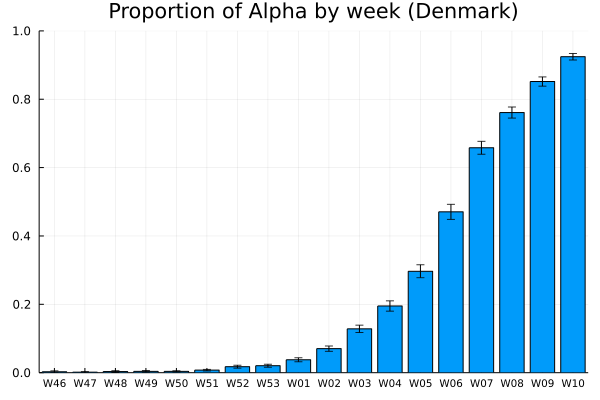

In [23]:
bar( dfAlpha.q, legend = :none,  xticks = (1:T, dfAlpha.Week), xtickfontsize=7, ylims=(0,1), xlims=(0.5,T+0.5),
    fmt = :png,
      title="Proportion of Alpha by week (Denmark)",yerror=1.96.*dfAlpha.σ)     

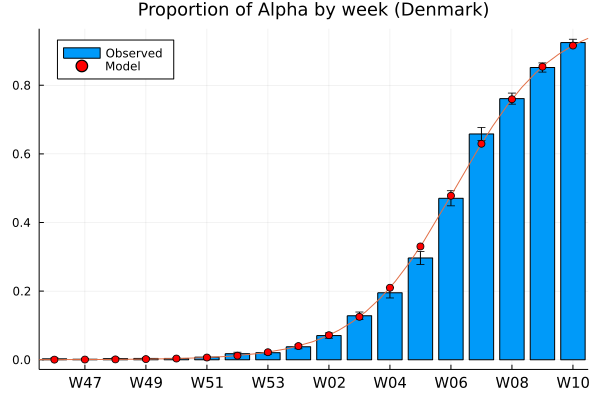

In [24]:
plot1 = bar( dfAlpha.q, legend = :topleft, label= "Observed", xticks = (2:2:T, dfAlpha.Week[2:2:T]), xtickfontsize=10,
    titlefontsize = 12,
      title="Proportion of Alpha by week (Denmark)",yerror=1.96.*dfAlpha.σ)     
plot!(t -> 1/(1+exp(-log(ρ̂₀) - t*log(γ̂))),label = :none, xlims = (0.5,T+0.5),) 
scatter!(dfAlpha.time_trend, dfAlpha.lam ,label = "Model", xlims = (0.5,T+0.5), color=:red)
plot1 

# When will/did Alpha become dominant variant?
We solve $$ 50\%  = \frac12 = \frac{\exp(\hat\alpha + \hat\beta\times \tau)}{1+\exp(\hat\alpha + \hat\beta\times \tau)}=\frac{1}{1+\exp(-\hat\alpha - \hat\beta\times \tau^\ast)}.$$
Rearrange  to get $ \exp (-\hat\alpha - \hat\beta\times \tau^\ast) = 1$, then take (natural) logarithm, to get 
$$ \tau^\ast = -\frac{\hat\alpha}{\hat\beta}.$$


In [25]:
print("τ∗ = ", round(-α̂/β̂,digits = 3))

τ∗ = 14.143

Weeks run from Monday to Sunday, with Thursday being the midpoint. Friday in Week 6 is 6+1/7 = 6.143 (1 days after Thursday). 

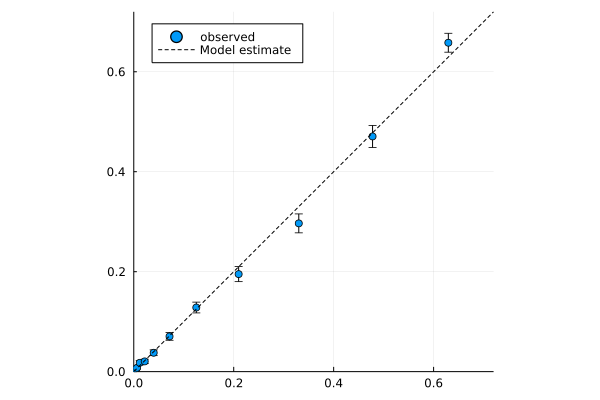

In [26]:
scatter(dfAlpha.lam,dfAlpha.q,label="observed",legend=:topleft, xlims=(0,0.72),ylims=(0,0.72),
    aspect_ratio = 1,
 yerror=1.96.*dfAlpha.σ)
plot!(x->x,label="Model estimate",linestyle=:dash,linecolor=:black)

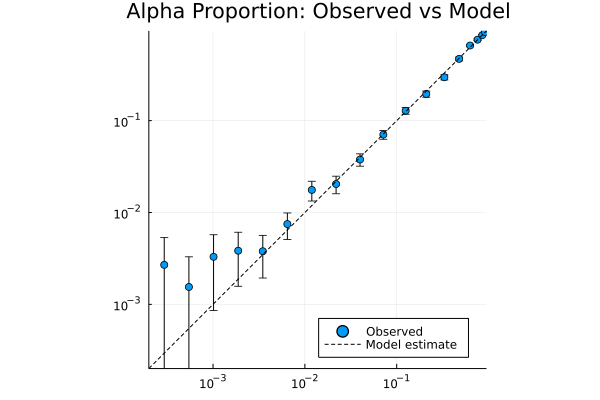

In [27]:
scatter(dfAlpha.lam,dfAlpha.q,label="Observed",legend=:bottomright, xlims=(0.0002,0.95),ylims=(0.0002,0.95),scale=:log10,
    aspect_ratio = 1, title = "Alpha Proportion: Observed vs Model", 
 yerror=1.96.*dfAlpha.σ)
plot!([0.0002:0.15:100],[0.0002:0.15:100],label="Model estimate",linestyle=:dash,linecolor=:black)

# Replicating Figure 4 (alpha)

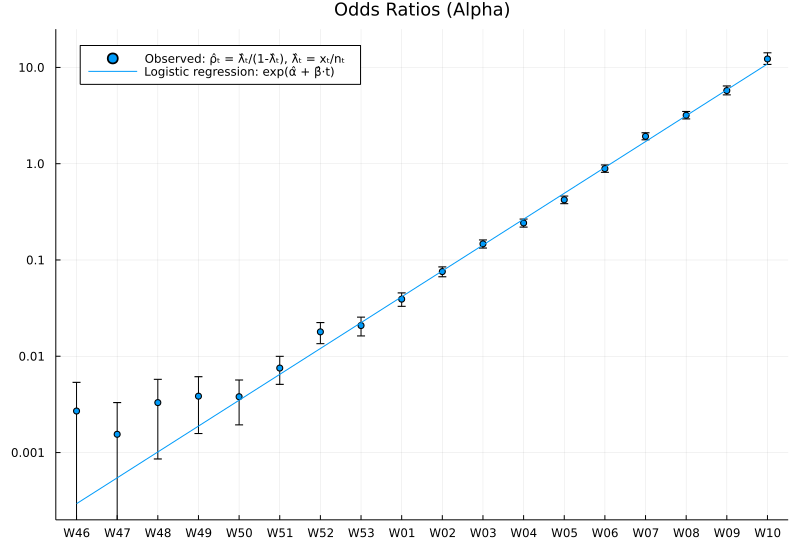

In [41]:
ql = q .- 1.96.*dfAlpha.σ
qu = q .+ 1.96.*dfAlpha.σ
ρ  = q  ./ (1 .- q)
ρl = ql ./ (1 .- ql) 
ρu = qu ./ (1 .- qu) 
scatter(dfAlpha.time_trend,ρ, yaxis =:log, label = "Observed: ρ̂ₜ = λ̂ₜ/(1-λ̂ₜ), λ̂ₜ = xₜ/nₜ",legend = :topleft, 
        fmt=png,
        title = "Odds Ratios (Alpha)",
        size=(800,550),
        titlefontsize = 12,  
        yticks = ([0.001,0.01,0.1,1,10]),
        xticks = (dfAlpha.time_trend, dfAlpha.Week),
        #xticks = (2-8:2:T-8, dfAlpha.Week[2:2:T]),  
        yformatter = y -> Float64(y),
        ylims=(0.0002,25),
    yerror=(ρ-ρl,ρu-ρ) )
plot!(t->exp(α̂+β̂*t),  label = "Logistic regression: exp(α̂ + β̂⋅t)",
    seriescolor=1
)

# SECTION 4.1 Out-of-Sample Analysis (Predicting last $H$ weeks)

We want robust standard errors. So MLE

## Forecasting horizing is $H$

👇  Change the value of $H$ to generate the figure for horizons 4, 6, 8, and 10.

In [36]:
H  = 10

10

In [28]:
# Inverse of Logit function
function tigol(x) 
    1/(1+exp(-x)) 
end

tigol (generic function with 1 method)

The maximum likelihood estimates are λ̂₀ = 0.0003 and γ̂  = 1.711.
 

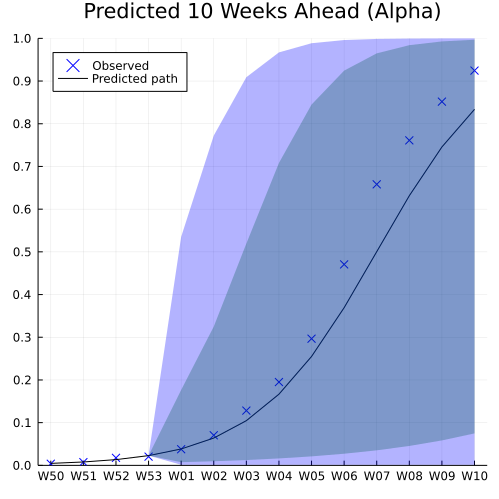

In [37]:
# In-sample Estimation predicting last H
# We estimate model with observations from Weeks 50 to 53/02/04/06 (for H=10/8/6/4)
T₀ = 4
T  = size(dfAlpha,1)
T₁ = T - H          # last observation in in-sample
K = 4               # bandwith parameter for std errors
# Estimation
θis = [-10,0.6] 
obj = θis -> -logL(θis,dfAlpha.n[T₀+1:T₁],dfAlpha.x[T₀+1:T₁],dfAlpha.time_trend[T₀+1:T₁],"Total")
    res = optimize(obj, θ, autodiff=:forward,iterations =10000,show_trace=false)
    θis .= Optim.minimizer(res)
    α̃ = θis[1]
    β̃ = θis[2]
    λ̂₀ = exp(θis[1])
    γ̂  = exp(θis[2])
print("The maximum likelihood estimates are λ̂₀ = $(round(λ̂₀,digits=4)) and γ̂  = $(round(γ̂,digits=3)).\n ")
Σ̂is = VCOV(θis,dfAlpha.n[T₀+1:T₁],dfAlpha.x[T₀+1:T₁],dfAlpha.time_trend[T₀+1:T₁],K) 

# model estimate and predicted path
dfAlpha.λ̂  = [tigol(α̃+β̃*dfAlpha.time_trend[i]) for i in 1:size(dfAlpha,1)]
# error bands 
dfAlpha.L2 = [0.0 for i in 1:T]; 
dfAlpha.L4 = [0.0 for i in 1:T]; 
dfAlpha.U2 = [0.0 for i in 1:T]; 
dfAlpha.U4 = [0.0 for i in 1:T]; 

for i in T₁+1:T
    t = dfAlpha.time_trend[i] 
    σₜ  = sqrt(norm([1 t]*Σ̂is*[1, t]))
    dfAlpha.L2[i] =  dfAlpha.λ̂[i] - tigol(α̃+β̃*t-2*σₜ)
    dfAlpha.U2[i] = tigol(α̃+β̃*t+2*σₜ) - dfAlpha.λ̂[i] 
    dfAlpha.L4[i] = dfAlpha.λ̂[i] - tigol(α̃+β̃*t-4*σₜ)
    dfAlpha.U4[i] = tigol(α̃+β̃*t+4*σₜ) - dfAlpha.λ̂[i]
end


plot(dfAlpha.Week[T₀+1:end],dfAlpha.q[T₀+1:end], fmt = png, ylims=(0,1),
        yticks = 0.0:0.1:1.0, size = (500,500),
        title="Predicted $H Weeks Ahead (Alpha)",
        label = "Observed", legend = :topleft, linewidth =0, markershape = :xcross,markersize = 4, color = :blue, linecolor = :white)
plot!(dfAlpha.Week[T₀+1:end],dfAlpha.λ̂[T₀+1:end] , 
        label = "Predicted path",  linecolor = :black)
plot!(dfAlpha.Week[T₁:end],dfAlpha.λ̂[T₁:end], ribbon = (dfAlpha.L2[T₁:end],dfAlpha.U2[T₁:end]),  
        fillalpha=0.3, linewidth =0, label =:none,# "Error bands (2σ)", 
        color=:green)
plot!(dfAlpha.Week[T₁:end],dfAlpha.λ̂[T₁:end], ribbon = (dfAlpha.L4[T₁:end],dfAlpha.U4[T₁:end]),  
        fillalpha=0.3, linewidth =0, label =:none,#        "Error bands (4σ)", 
        color=:blue
)


# SECTION 4.2: 
## How fast are case numbers for the variants increasing/decreasing?
So far we have only estimated the relative contagiousness of Alpha. It is interesting to know if Alpha case numbers are increasing or decreasing. Fortunately we can infer Alphas reproductive number from that of all cases, once we know the proportion of Alpha variants, and $\gamma$.

Let $C$ be the number of cases this week. The $\lambda C$ are the Alpha variant and $(1-\lambda)C$ is the non-Alpha variant. 

If the current reproduction numbers are $R$ (all cases) $R_B$ (Alpha cases), and $R_A$ (non-Alpha cases), then the cases one generation ago were $C/R$, $\lambda C/R_B$, and $(1-\lambda)C/R_A= \gamma (1-\lambda)C/R_B$, where we used $R_A=R_B/\gamma $. These have to add up, so that 
$$
\frac{C}{R}=\frac{\lambda C}{R_B}+\frac{\gamma (1-\lambda)C}{R_B} \Leftrightarrow 
\frac{1}{R}=\frac{\lambda +\gamma (1-\lambda)}{R_B}$$
and rearranging gives us
$$ R_B = R_B(\lambda,R,\gamma) = R \left[\gamma-(\gamma-1)\lambda\right].$$

We estimated $\gamma\approx 1.51$ (for a generation period). So we can infer the reproduction number of the Alpha variant using the formula:

$$ \hat{R}_B  \simeq  R \left[1.51-0.51\lambda\right].$$



The actual value of $c_t$ is unobserved. A simple crude way to approximate it, is to use recent changes the all-variant cases, such as:

## Reproduction Number for Alpha: What is the latest estimates?
Crude estimate: Exp(4.7/7.0 * log(CasesThisWeek/CasesLastWeek))

First we have to adjust the number of cases for the number of tested using: 
$$\mathrm{CasesAdjusted}_t  = \left(\frac{\bar{N}}{N_t}\right)^{0.7}\times\mathrm{Cases}_t,$$ where $\bar N$ is the average number of weekly tests. The choice for baseline, $\bar{N}$, does not influence relative number of cases across weeks. 

In [29]:
dfAlpha.Tested[end-1:end],
dfAlpha.Cases[end-1:end]
#dfAlpha.Cases[end-1],dfAlpha.Cases[end].*(dfAlpha.Tested[end-1]/dfAlpha.Tested[end])^0.7

([1032966, 1056364], [3616, 3809])

In [30]:
BETA = 0.7
TestedPerWeekAverage      = sum(dfAlpha.Tested)/size(dfAlpha.Tested,1)
dfAlpha.CaseAdjFactor = (TestedPerWeekAverage./dfAlpha.Tested).^(BETA)
dfAlpha.CasesAdj      = dfAlpha.Cases .* dfAlpha.CaseAdjFactor

18-element Vector{Float64}:
  9842.506158560323
 10859.179494348584
 11277.253556549556
 15582.33350678513
 22499.62240516066
 21335.332088426178
 18359.444995449812
 17879.948655183598
 13449.886425324434
  7996.234505927673
  5216.727443638271
  3451.953131353086
  2895.8816659074405
  2508.930605124261
  3012.1071543990197
  3016.4626567446003
  2800.0334709680296
  2903.597928543812

In [31]:
Rtotal =  exp(4.7/7.0 * log(dfAlpha.CasesAdj[end]/dfAlpha.CasesAdj[end-1]))

1.024685555286036

In [32]:
AlphaProp = 1/(1+exp(-α̂-β̂*dfAlpha.time_trend[end]))

0.915739204393609

In [33]:
Rₐ = Rtotal *(1.5-0.5*AlphaProp)
print("Estimate is: R(α) = ", round(Rₐ,digits=3))

Estimate is: R(α) = 1.068

## Replicating Figure for Section 4.2 

In [34]:
###########
# The reproduction number for Alpha (generation = 4.7 days) computed from:
# The proportion of Alpha
# R_all = reproduction number for all variants 
# γ relative contagiouness (weekly rate)
γ̂gen = exp(4.7/7*log(γ̂))
#############
Rb(λ,R,γ) = R*(γ-(γ-1)*λ)
###############
# Specialized function for countour plot using point estimate of γ
Rb2(λ,R) = Rb(λ,R,γ̂gen)  
#################
# Solves for R(all), given \gamma, x (= vector of λs) and a given Alpha reproduction number 
Rsolve(x,γ,RB) = RB ./ (γ .+ (1-γ) .* x) # The value of
########################
ymin = 0.3; 
ymax = 1.21
γᵤ = exp(4.7/7.0 * confint(glmAlpha)[2,2])
γₗ  = exp(4.7/7.0 * confint(glmAlpha)[2,1])
x1 = 0:0.001:1
y1 = ymin:0.001:ymax
T₁ = 7;  

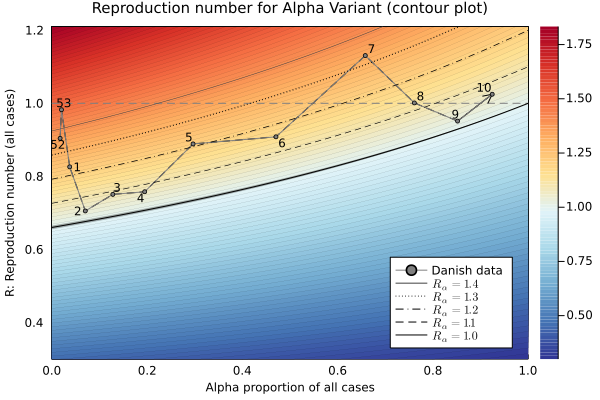

┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/prhansen/.julia/packages/Plots/FCM0H/src/backends/gr.jl:2015


In [35]:
contour(x1,y1,Rb2, levels=100, line = false, fill=(true,
        cgrad(:RdYlBu_10,rev=true)),  xlim=(0,1), ylim = (ymin,ymax),
    legend = :bottomright,xlabel = "Alpha proportion of all cases", 
    labelfontsize = 8,
    ylabel = "R: Reproduction number (all cases)",
    titlefontsize = 10,
    title = "Reproduction number for Alpha Variant (contour plot)", fmt = :png) 
#if ymax>1
    plot!(x->1, linecolor=:gray, linestyle=:dash, label=:false) 
#end   
###############################
plot!([dfAlpha.q[T₁:T]], [exp.(4.7/7.0 .* log.(dfAlpha.CasesAdj[T₁:T]./dfAlpha.CasesAdj[T₁-1:T-1]))], markersize=3, 
    label=:false,
    linecolor = :black, linestyle=:dash, line=:arrow)
plot!([dfAlpha.q[T₁:T]], [exp.(4.7/7.0 .* log.(dfAlpha.CasesAdj[T₁:T]./dfAlpha.CasesAdj[T₁-1:T-1]))], markersize=3, 
    label="Danish data",
    marker=:true, color = :gray,  linesty1e=:none,
    series_annotations=[text("52 ",8,:top),text(" 53",8,:bottom),text(" 1",8,:left),text("2 ",8,:right),text("  3",8,:bottom),text("4  ",8,:top),text("5  ",8,:bottom),
         text("   6",8,:top),text("   7",8,:bottom),text("   8",8,:bottom),text("9 ",8,:bottom),text("10    ",8,:bottom)])
plot!(x -> Rsolve(x,γ̂gen,1.4), linecolor = :gray25, lw = 0.5, linestyle=:solid, xlim=(0,1),label=L"$R_{\alpha} = 1.4$")
plot!(x -> Rsolve(x,γ̂gen,1.3), linecolor = :black, lw = 1.2, linestyle=:dot, xlim=(0,1),label=L"$R_{\alpha} = 1.3$")
plot!(x -> Rsolve(x,γ̂gen,1.2), linecolor = :black, lw = 0.75, linestyle=:dashdot, xlim=(0,1),label=L"$R_{\alpha} = 1.2$")
plot!(x -> Rsolve(x,γ̂gen,1.1), linecolor = :black, lw = 0.65, linestyle=:dash, xlim=(0,1),label=L"$R_\alpha = 1.1$")
plot!(x1 , Rsolve(x1,γ̂gen,1.0) , linecolor = :black, xlim=(0,1), lw = 1, label=L"$R_\alpha = 1.0$", fmt=png,
          ribbon = ( Rsolve(x1,γ̂gen,1.0)-Rsolve(x1,γₗ,1.0) , Rsolve(x1,γᵤ,1.0)-Rsolve(x1,γ̂gen,1.0)), fillcolor = :black, fillalpha = 0.3 )